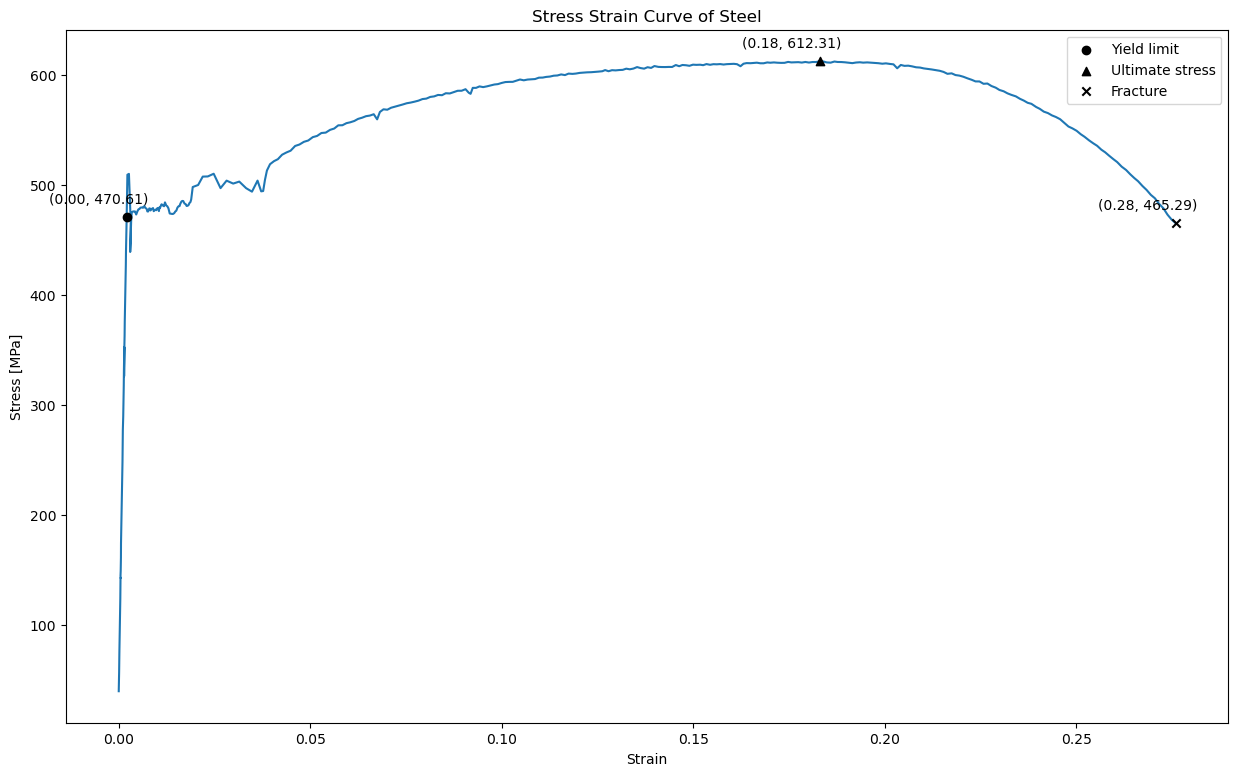

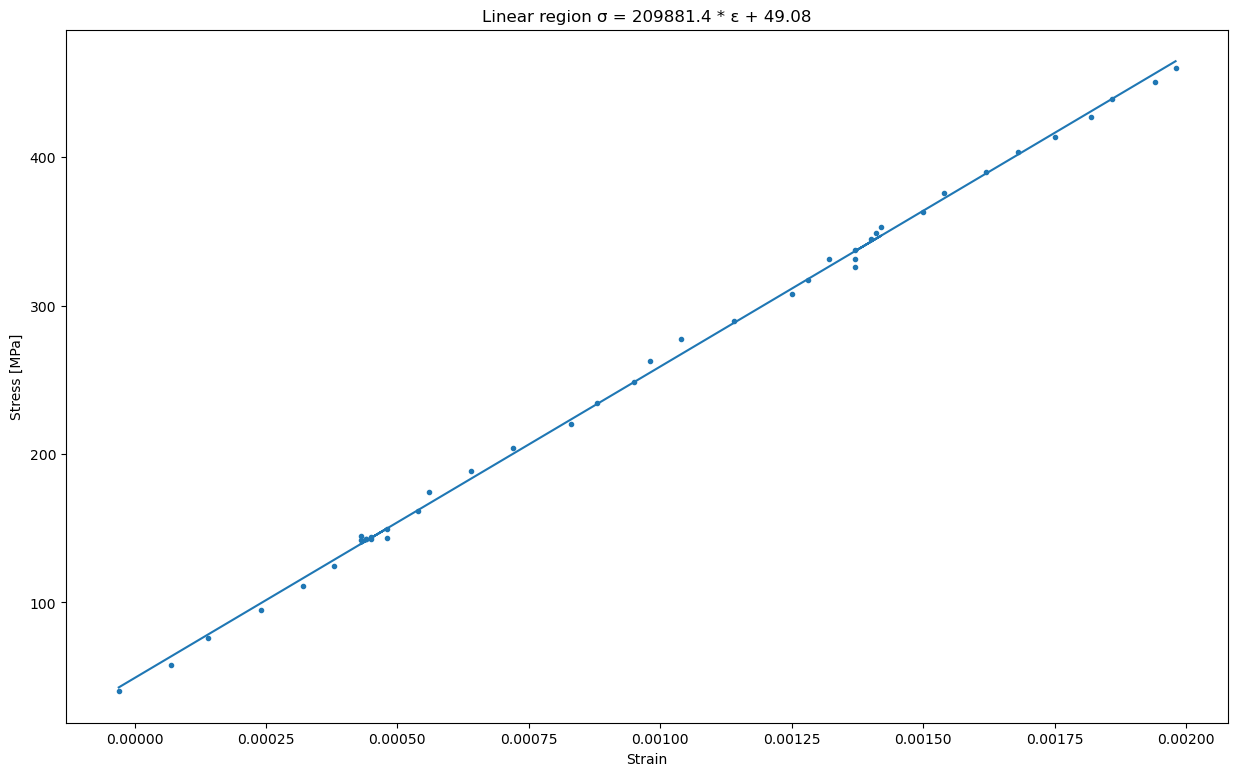

The percent elongation is 27.59% with an ultimate length of 63.8mm
The percent reduction of the area is -68.39%


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

df = pd.read_excel('./Results_traction_1223.xlsx')

def calcStress(loads, area):
    stresses = []
    for load in loads:
        stress = round(load/area, 2)
        stresses.append(stress)
    return stresses

def calcStrain(deformations, length):
    strains = []
    for deformation in deformations:
        strain = round((deformation/length), 5)
        strains.append(strain)
    return strains

#Stress vs Strain
def stressStrainCurve(area, length, force, deltaL):
    df['Stress [MPa]'] = calcStress(df[force], area)
    df['Strain'] = calcStrain(df[deltaL], length)
    yieldLimit = 0
    for strain in df['Strain']:
        if not strain < 0.002:
            yieldLimit = df.loc[(df == strain).any(axis=1)].index[0]
            break
    yieldLimitStrain = df.loc[yieldLimit, 'Strain']
    yieldLimitStress = df.loc[yieldLimit, 'Stress [MPa]']
    plt.figure(figsize=(15,9))
    plt.plot(df['Strain'], df['Stress [MPa]'])
    #Yield limit
    plt.scatter(yieldLimitStrain, yieldLimitStress, color='black', marker='o', label=f'Yield limit', zorder=2)
    plt.annotate(f"({yieldLimitStrain:.2f}, {yieldLimitStress:.2f})", 
             (yieldLimitStrain, yieldLimitStress), 
             textcoords="offset points", xytext=(-20, 10), ha='center')
    #Ultimate stress
    UTS_index = df['Stress [MPa]'].idxmax()
    UTS_strain = df.loc[UTS_index, 'Strain']
    UTS_stress = df.loc[UTS_index, 'Stress [MPa]']
    plt.scatter(UTS_strain, UTS_stress, color='black', marker='^', label=f'Ultimate stress', zorder=2)
    plt.annotate(f"({UTS_strain:.2f}, {UTS_stress:.2f})", 
             (UTS_strain, UTS_stress), 
             textcoords="offset points", xytext=(-20, 10), ha='center')
    #Fracture
    fractureStrain = df['Strain'].iloc[-1]
    fractureStress = df['Stress [MPa]'].iloc[-1]
    
    if not fractureStress == UTS_stress:
        plt.scatter(fractureStrain, fractureStress, color='black', marker='x', label=f'Fracture', zorder=2)
        plt.annotate(f"({fractureStrain:.2f}, {fractureStress:.2f})", 
                (fractureStrain, fractureStress), 
                textcoords="offset points", xytext=(-20, 10), ha='center')
    plt.xlabel('Strain')
    plt.ylabel('Stress [MPa]')
    plt.title('Stress Strain Curve of Steel')
    plt.legend()
    plt.show()
    return yieldLimit

#Young's Modulus
def youngsModulus(area, length, force, deltaL):
    yieldLimit = stressStrainCurve(area, length, force, deltaL)               
    x = df['Strain'].head(yieldLimit)
    y = df['Stress [MPa]'].head(yieldLimit)
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    def calcY(x):
        return slope * x + intercept
    model = list(map(calcY, x))
    plt.figure(figsize=(15,9))
    plt.scatter(x, y, marker='.')
    plt.plot(x, model)
    plt.xlabel('Strain')
    plt.ylabel('Stress [MPa]')
    plt.title('Linear region ' + 'σ = ' + str(round(slope, 2)) + ' * ε' + ' + ' + str(round(intercept, 2)))
    plt.show()
youngsModulus(50.3, 50, 'Load [ N ]', 'Deformation [ mm ]')

#Percent elongation
def calcElongation(deformations, initLength):
    ultLength = deformations.iloc[-1] + initLength
    return ((ultLength-initLength) * 100)/initLength, ultLength
elongation, ultLength = calcElongation(df['Deformation [ mm ]'], 50)
print(f'The percent elongation is {round(elongation,2)}% with an ultimate length of {round(ultLength, 2)}mm')

def calcAreaReduction(ultArea, initArea):
    return ((ultArea-initArea)*100)/initArea
print(f'The percent reduction of the area is {round(calcAreaReduction(15.9, 50.3),2)}%')



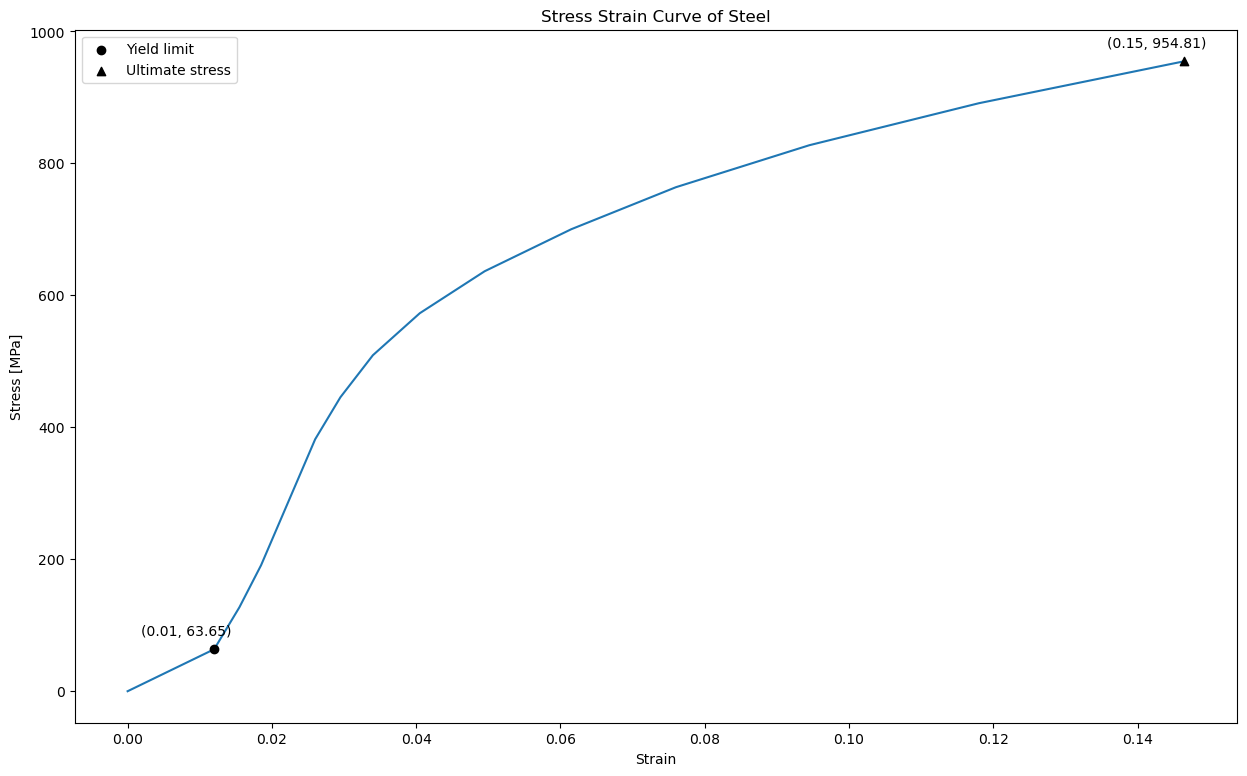

,Compression Force (F) [N],Shortening (ΔL_s) [mm],Stress [MPa],Strain
0,0,0.00,0.00,0.0000
1,20000,0.24,63.65,0.0120
2,40000,0.31,127.31,0.0155
3,60000,0.37,190.96,0.0185
4,80000,0.42,254.61,0.0210
5,100000,0.47,318.27,0.0235
6,120000,0.52,381.92,0.0260
7,140000,0.59,445.58,0.0295
8,160000,0.68,509.23,0.0340
9,180000,0.81,572.88,0.0405


In [59]:
df = pd.read_excel('./compression_testing.xlsx')
stressStrainCurve(314.2, 20, 'Compression Force (F) [N]', 'Shortening (ΔL_s) [mm]')
df.head(15)